In [1]:
# Importar las librerias o paquetes que necesitemos
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.cluster import KMeans
from ipywidgets import ColorPicker, VBox, interact, interactive, fixed
import struct
import ipyvolume as ipv
from pylab import *

In [2]:
dataset = pd.read_csv('data.csv', engine = 'c')

In [3]:
dataset.head(1)

,Power,I1,I2,I3,V1,V2,V3,V4,V5,V6,...,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48
0,9751.855054,7.82412,7.711217,7.659327,26.98123,26.98123,26.973406,26.98123,26.98123,26.98123,...,25.923836,25.923836,25.916177,25.923836,25.923836,25.923836,25.923836,25.916177,25.923836,25.923836


In [4]:
temporal_normal = dataset[dataset['Power'] > 9200]

temporal_normal = temporal_normal['Power']
shape = temporal_normal.shape
temporal_normal = pd.DataFrame(temporal_normal, columns= ['Power'])
print(f'el shape de la data es {shape}')
print(f' el tipo de estructura es  {type(temporal_normal)}')

el shape de la data es (1985,)
 el tipo de estructura es  <class 'pandas.core.frame.DataFrame'>


In [63]:
def boxplotvalue(dataset):
    
    first_percentile = np.percentile(dataset, 25)
    third_percentile = np.percentile(dataset, 75)
    IRQ = third_percentile - first_percentile
    lower_limit = first_percentile - (1.5*IRQ)
    return lower_limit

def processingData(dataset, lower_limit, column):
    
    dataset['outlier'] = dataset[column].apply(lambda x : 1 if x < lower_limit else 0)
    
    return dataset

def preprocessing_normal(dataset, attr, attr2):
    temporal = dataset[dataset[attr] > 9200]
    temporal = temporal[attr2]
    shape = temporal.shape
    temporal = pd.DataFrame(temporal, columns= [attr2])
    print(f'el shape de la data es {shape}')
    print(f' el tipo de estructura es  {type(temporal)}')
    return temporal

def preprocessing_no_normal(dataset, attr, attr2):
    temporal = dataset[dataset[attr] < 9200]
    temporal = temporal[attr2]
    shape = temporal.shape
    temporal = pd.DataFrame(temporal, columns= [attr2])
    print(f'el shape de la data es {shape}')
    print(f' el tipo de estructura es  {type(temporal)}')
    return temporal
    

In [6]:
lower_limit =  boxplotvalue(temporal_normal)
print(f' el limite inferior es de  {lower_limit}')

 el limite inferior es de  9319.726327


In [7]:
dataset_eval_normal = processingData(temporal_normal, lower_limit,  'Power')
dataset_eval_normal.shape

(1985, 2)

In [8]:
def evaluation(dataset, eval= 'normal'):
    if eval == 'normal':
        try:
            normal = dataset.outlier.value_counts()[0]
            no_normal =  dataset.outlier.value_counts()[1]
        except:
            no_normal =  dataset.outlier.value_counts()[1]
            normal = 0
    
        return print(f' la cantidad de valores normales fueron {normal} y la cantidad de no normales es de {no_normal} para un acuracy de {(1-(no_normal/(normal+no_normal)))*100} %')
    else:
        try:
            normal = dataset.outlier.value_counts()[0]
            no_normal =  dataset.outlier.value_counts()[1]
        except:
            no_normal =  dataset.outlier.value_counts()[1]
            normal = 0
        return print(f' la cantidad de valores normales fueron {normal} y la cantidad de no normales es de {no_normal} para un acuracy de {(1-(normal/(normal+no_normal)))*100} %')
            

In [9]:
#### Esta es la evaluación en la data normal, aplicando boxplot con Power
evaluation(dataset_eval_normal)

 la cantidad de valores normales fueron 1980 y la cantidad de no normales es de 5 para un acuracy de 99.74811083123426 %


In [10]:
###### Ahora lo vamos a aplicar a la data no normal

dataset_no_normal = preprocessing_no_normal(dataset, 'Power', 'Power')
dataset_eval_no_normal = processingData(dataset_no_normal, lower_limit, 'Power')
evaluation(dataset_eval_no_normal, 'no_normal')

el shape de la data es (2493,)
 el tipo de estructura es  <class 'pandas.core.frame.DataFrame'>
 la cantidad de valores normales fueron 0 y la cantidad de no normales es de 2493 para un acuracy de 100.0 %


In [65]:
### Lo mismo para I1
dataset_normal_I1 = preprocessing_normal(dataset, 'Power', 'I1')
lower_limit_I1 = boxplotvalue(dataset_normal_I1)
dataset_eval_normal_I1 = processingData(dataset_normal_I1, lower_limit_I1, 'I1')
evaluation(dataset_eval_normal_I1)

el shape de la data es (1985,)
 el tipo de estructura es  <class 'pandas.core.frame.DataFrame'>
 la cantidad de valores normales fueron 1981 y la cantidad de no normales es de 4 para un acuracy de 99.7984886649874 %


,I1,outlier
0,7.824120,0
1,7.493863,0
2,7.504908,0
3,7.505353,0
4,7.516942,0
...,...,...
4271,7.506123,0
4272,7.527603,0
4273,7.524862,0
4274,7.515305,0


In [12]:
dataset_no_normal_I1 = preprocessing_no_normal(dataset, 'Power', 'I1')
dataset_eval_no_normal_I1 = processingData(dataset_no_normal_I1, lower_limit_I1, 'I1')
evaluation(dataset_eval_no_normal_I1, 'no_normal')

el shape de la data es (2493,)
 el tipo de estructura es  <class 'pandas.core.frame.DataFrame'>
 la cantidad de valores normales fueron 1659 y la cantidad de no normales es de 834 para un acuracy de 33.45367027677497 %


In [13]:
### Lo mismo para I2
dataset_normal_I2 = preprocessing_normal(dataset, 'Power', 'I2')
lower_limit_I2 = boxplotvalue(dataset_normal_I2)
dataset_eval_normal_I2 = processingData(dataset_normal_I2, lower_limit_I2, 'I2')
evaluation(dataset_eval_normal_I2)

el shape de la data es (1985,)
 el tipo de estructura es  <class 'pandas.core.frame.DataFrame'>
 la cantidad de valores normales fueron 1953 y la cantidad de no normales es de 32 para un acuracy de 98.38790931989925 %


In [14]:
dataset_no_normal_I2 = preprocessing_no_normal(dataset, 'Power', 'I2')
dataset_eval_no_normal_I2 = processingData(dataset_no_normal_I2, lower_limit_I2, 'I2')
evaluation(dataset_eval_no_normal_I2, 'no_normal')

el shape de la data es (2493,)
 el tipo de estructura es  <class 'pandas.core.frame.DataFrame'>
 la cantidad de valores normales fueron 1961 y la cantidad de no normales es de 532 para un acuracy de 21.339751303650225 %


In [15]:
### Lo mismo para I3
dataset_normal_I3 = preprocessing_normal(dataset, 'Power', 'I3')
lower_limit_I3 = boxplotvalue(dataset_normal_I3)
dataset_eval_normal_I3 = processingData(dataset_normal_I3, lower_limit_I3, 'I3')
evaluation(dataset_eval_normal_I3)

el shape de la data es (1985,)
 el tipo de estructura es  <class 'pandas.core.frame.DataFrame'>
 la cantidad de valores normales fueron 1975 y la cantidad de no normales es de 10 para un acuracy de 99.49622166246851 %


In [16]:
dataset_no_normal_I3 = preprocessing_no_normal(dataset, 'Power', 'I3')
dataset_eval_no_normal_I3 = processingData(dataset_no_normal_I3, lower_limit_I3, 'I3')
evaluation(dataset_eval_no_normal_I3, 'no_normal')

el shape de la data es (2493,)
 el tipo de estructura es  <class 'pandas.core.frame.DataFrame'>
 la cantidad de valores normales fueron 1356 y la cantidad de no normales es de 1137 para un acuracy de 45.607701564380264 %


In [17]:
### aqui plotea alito

In [18]:
def plotting_boxplot(dataset, lower_limit, column):
    lower_limit_plot = np.empty(dataset.shape[0])
    lower_limit_plot.fill(lower_limit)
    lower_limit_plot
    series = dataset[column].to_numpy()
    x = dataset[column].index.to_numpy()

    p1, p2 = plot(x, lower_limit_plot, x, series)

    legend(('Lower Limit', 'Real Data'),
    prop = {'size': 10}, loc='upper right')

    xlabel('Metricas')
    ylabel('Numeros')
    title('Boxplot')

# Creo una figura (ventana), pero indico el tamaño (x,y) en pulgadas
    figure(figsize=(12, 5))

    show()


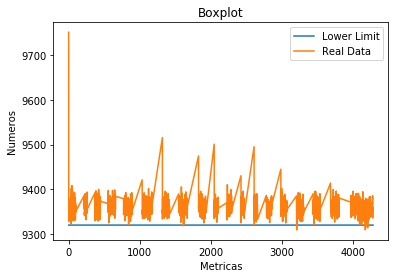

<Figure size 864x360 with 0 Axes>

La evaluación de power se ve muy buena para la data normal


In [19]:
plotting_boxplot(dataset_eval_normal,lower_limit, 'Power')

print("La evaluación de power se ve muy buena para la data normal")

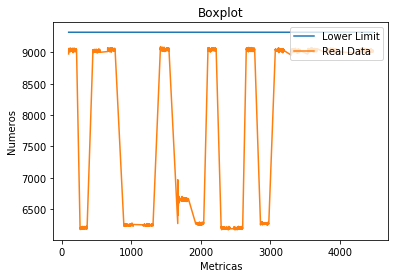

<Figure size 864x360 with 0 Axes>

La evaluación de power se ve muy buena para la data no normal


In [20]:
plotting_boxplot(dataset_eval_no_normal,lower_limit, 'Power')
print("La evaluación de power se ve muy buena para la data no normal")

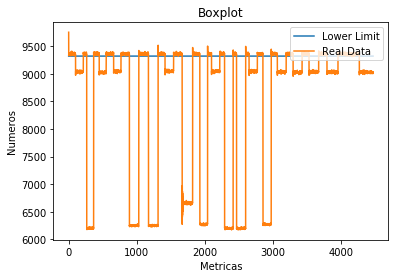

<Figure size 864x360 with 0 Axes>

La evaluación de power se ve muy buena para la data combinada


In [21]:
plotting_boxplot(dataset,lower_limit, 'Power')
print("La evaluación de power se ve muy buena para la data combinada")

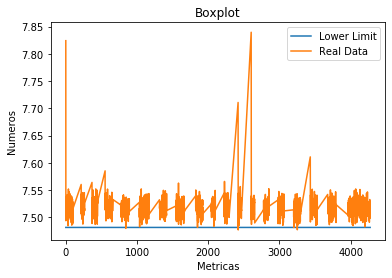

<Figure size 864x360 with 0 Axes>

La evaluación de I1 se ve muy buena para la data normal


In [22]:
plotting_boxplot(dataset_eval_normal_I1,lower_limit_I1, 'I1')
print("La evaluación de I1 se ve muy buena para la data normal")

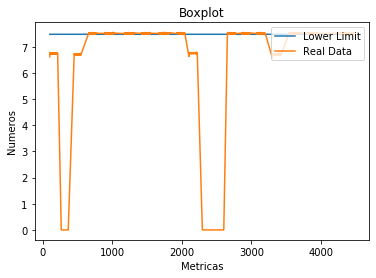

<Figure size 864x360 with 0 Axes>

La evaluación de I1 para la data no normal no se ve tan bien, de hecho solo tiene el 33% de accuracy


In [23]:
plotting_boxplot(dataset_eval_no_normal_I1,lower_limit_I1, 'I1')
print("La evaluación de I1 para la data no normal no se ve tan bien, de hecho solo tiene el 33% de accuracy")

## Corrientes 

In [48]:
### vamos a juntar corrientes
### Si la corriente 1 o corriente 2 o corriente 3 es no normal, hay que clasificar como fallo
dataset_eval_normal_I1.columns = ['I1','outlier_I1']

dataset_eval_normal_I2.columns = ['I2','outlier_I2']

dataset_eval_normal_I3.columns = ['I3','outlier_I3']

dataset_concat = pd.concat([dataset_eval_normal_I1,dataset_eval_normal_I2,dataset_eval_normal_I3],  axis=1)

dataset_concat['outlier'] = [1 if x > 0 else 1 if y>0 else 1 if z > 0 else 0 for x,y,z in zip(dataset_concat['outlier_I1'],dataset_concat['outlier_I2'],dataset_concat['outlier_I3'])]


In [51]:
print('''podemos observar que la combinacion de corrientes baja un poco el acccuracy en 1 % en promedio, 
esto para los casos que son normales, ahora vamos a evaluar los casos que no son normales para determinar el accuracy''')
evaluation(dataset_concat)

podemos observar que la combinacion de corrientes baja un poco el acccuracy en 1 % en promedio, 
esto para los casos que son normales, ahora vamos a evaluar los casos que no son normales para determinar el accuracy
 la cantidad de valores normales fueron 1942 y la cantidad de no normales es de 43 para un acuracy de 97.8337531486146 %


In [52]:
dataset_eval_no_normal_I1.columns = ['I1','outlier_I1']

dataset_eval_no_normal_I2.columns = ['I2','outlier_I2']

dataset_eval_no_normal_I3.columns = ['I3','outlier_I3']

dataset_no_normal_concat = pd.concat([dataset_eval_no_normal_I1,dataset_eval_no_normal_I2,dataset_eval_no_normal_I3],  axis=1)

dataset_no_normal_concat['outlier'] = [1 if x > 0 else 1 if y>0 else 1 if z > 0 else 0 for x,y,z in zip(dataset_no_normal_concat['outlier_I1'],dataset_no_normal_concat['outlier_I2'],dataset_no_normal_concat['outlier_I3'])]


In [55]:
evaluation(dataset_no_normal_concat, 'no_normal')

 la cantidad de valores normales fueron 0 y la cantidad de no normales es de 2493 para un acuracy de 100.0 %


In [73]:
# Ahora vamos a sacar los promedios de las 3 corrientes, calcular el limite para la evaluacion

dataset_concat['I_ave'] = (dataset_concat['I1']+ dataset_concat['I2']+ dataset_concat['I3'])/3

lower_limit_I1_ave = boxplotvalue(dataset_concat['I_ave'])

dataset_eval_normal_I_ave = processingData(pd.DataFrame(dataset_concat['I_ave'], columns = ['I_ave']), lower_limit_I1_ave, 'I_ave')
evaluation(dataset_eval_normal_I_ave)


 la cantidad de valores normales fueron 1980 y la cantidad de no normales es de 5 para un acuracy de 99.74811083123426 %


In [77]:
### Ahora vamos a evaluar los no normales

dataset_no_normal_concat['I_ave'] = (dataset_no_normal_concat['I1']+ dataset_no_normal_concat['I2']+ dataset_no_normal_concat['I3'])/3

dataset_eval_no_normal_I_ave = processingData(pd.DataFrame(dataset_no_normal_concat['I_ave'], columns = ['I_ave']), lower_limit_I1_ave, 'I_ave')
evaluation(dataset_eval_no_normal_I_ave, 'no_normal')

 la cantidad de valores normales fueron 0 y la cantidad de no normales es de 2493 para un acuracy de 100.0 %


# Clustering

In [84]:
# para la parte de clustering, podriamos hacerlo de varias maneras, la primera es realizar un PCA con 3 dimensiones
# Lo cual no nos diria mucho por la interpretacion de las mismas.
# La segunda seria Power, I promecio y Voltaje promedio, creo que esa podria ser una buena opcion


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48
0,26.981230,26.981230,26.973406,26.981230,26.981230,26.981230,26.981230,26.981230,25.676113,25.676113,...,25.923836,25.923836,25.916177,25.923836,25.923836,25.923836,25.923836,25.916177,25.923836,25.923836
1,26.595084,26.590496,26.581026,26.581640,26.578936,26.585754,26.587160,26.583894,26.062479,26.069642,...,26.130718,26.121655,26.121467,26.123370,26.125228,26.124651,26.115087,26.125892,26.122222,26.119418
2,26.558807,26.554412,26.545014,26.545930,26.543340,26.549870,26.551216,26.548088,26.091001,26.097861,...,26.101107,26.092450,26.091930,26.094089,26.095863,26.095312,26.086177,26.096156,26.092992,26.090314
3,26.517370,26.512969,26.503568,26.504474,26.501881,26.508420,26.509769,26.506636,26.129142,26.136012,...,26.082333,26.073660,26.073154,26.075302,26.077079,26.076527,26.067376,26.077387,26.074203,26.071521
4,26.582297,26.577895,26.568483,26.569400,26.566807,26.573346,26.574695,26.571562,26.075063,26.081934,...,26.121293,26.112622,26.112098,26.114264,26.116041,26.115489,26.106339,26.116331,26.113165,26.110483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4473,26.608449,26.604055,26.594667,26.595574,26.592984,26.599513,26.600860,26.597732,26.049304,26.056164,...,28.082237,28.074487,28.074026,28.075954,28.077542,28.077049,28.068871,28.077809,28.074972,28.072575
4474,26.624369,26.619973,26.610559,26.611489,26.608898,26.615430,26.616777,26.613648,26.039757,26.046619,...,28.077814,28.070055,28.069594,28.071524,28.073114,28.072620,28.064433,28.073381,28.070541,28.068141
4475,26.648529,26.644119,26.634718,26.635606,26.633007,26.639560,26.640912,26.637772,26.016033,26.022918,...,28.093464,28.085698,28.085244,28.087168,28.088760,28.088266,28.080070,28.089035,28.086184,28.083782
4476,26.675953,26.671554,26.662162,26.663063,26.660471,26.667007,26.668355,26.665224,25.984425,25.991292,...,28.085275,28.077510,28.077076,28.078980,28.080571,28.080077,28.071883,28.080866,28.077996,28.075594


In [101]:
dataset['I_ave'] = (dataset['I1']+dataset['I2']+dataset['I3'])/3
dataset['V_ave'] = (dataset.iloc[: , 4:52].sum(axis=1))/48
dataset_cluster = dataset[['Power', 'I_ave', 'V_ave']]

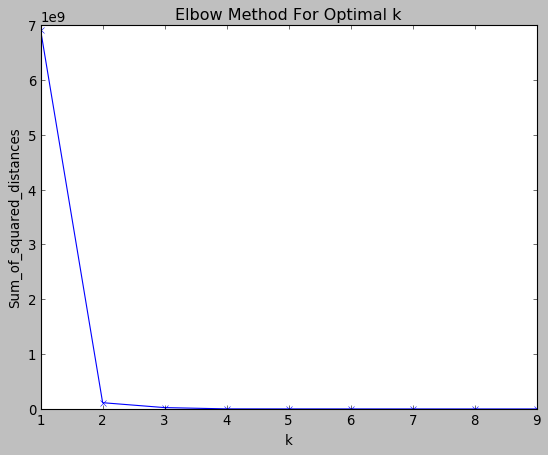

In [102]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(dataset_cluster)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [103]:
kmeans = KMeans(n_clusters=4)
kmeans = kmeans.fit(dataset_cluster)
labels = kmeans.predict(dataset_cluster)
labels

array([2, 2, 2, ..., 0, 0, 0])

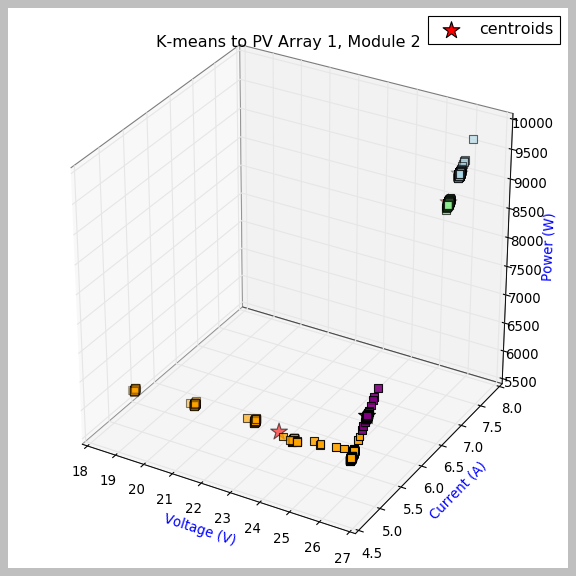

In [104]:
colores = ['lightgreen','orange','lightblue', 'purple','bisque', 'peru', 'coral']
asignar=[]
for row in labels:
    asignar.append(colores[row])
plt.style.use('_classic_test')
fig = plt.figure(figsize=(7,7))
#ax = fig.gca(projection='3d')
ax = Axes3D(fig)
ax.scatter(dataset_cluster.iloc[:, 2], dataset_cluster.iloc[:, 1], dataset_cluster.iloc[:, 0], 
          c=asignar, marker='s', s=50, edgecolor='black')
ax.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 1], 
           kmeans.cluster_centers_[:, 0], marker='*', c='red', edgecolor='black', s=250, label='centroids')

ax.legend(scatterpoints=1)
#ax.legend(loc='upper right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
ax.xaxis.pane.set_edgecolor('black')
ax.yaxis.pane.set_edgecolor('black')
ax.zaxis.pane.set_edgecolor('black')

ax.tick_params(axis='x', labelcolor='black')
ax.tick_params(axis='y', labelcolor='black')
ax.tick_params(axis='z', labelcolor='black')
ax.set_xlabel('Voltage (V)',color='blue')
ax.set_ylabel('Current (A)',color='blue')
ax.set_zlabel('Power (W)',color='blue')
ax.set_title('K-means to PV Array 1, Module 2')
plt.savefig('K-means to PV Array 1, Module 2.png')
plt.show()

In [106]:
# NO normal
dataset['I_ave'] = (dataset['I1']+dataset['I2']+dataset['I3'])/3
dataset['V_ave'] = (dataset.iloc[: , 4:52].sum(axis=1))/48
dataset_cluster_no_normal = dataset[['Power', 'I_ave', 'V_ave']]
dataset_cluster_no_normal[dataset_cluster_no_normal['Power'] < 9200]

,Power,I_ave,V_ave
102,8973.854359,7.114860,26.327180
103,9050.092954,7.175273,26.327301
104,9049.136066,7.174298,26.328094
105,9028.141579,7.158353,26.325525
106,9024.672583,7.155589,26.325574
...,...,...,...
4473,9014.819058,7.147553,26.326395
4474,9035.946557,7.163437,26.329577
4475,9021.186553,7.151677,26.329793
4476,9003.430889,7.138168,26.327705


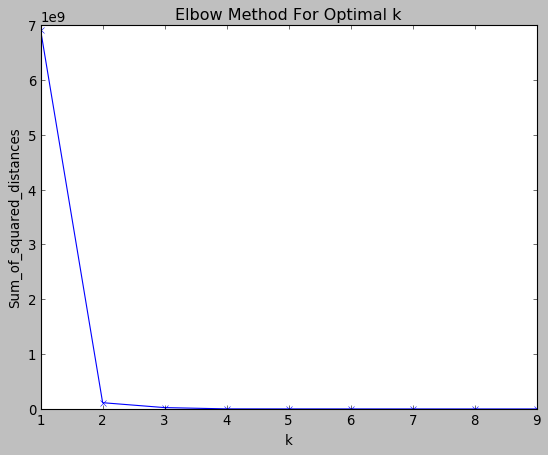

In [107]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(dataset_cluster_no_normal)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

## Clustering por corriente

In [5]:
dataset_i1_v = dataset[['I1', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16']]

In [14]:
new_df = pd.DataFrame(columns= ['voltaje' , 'valor', 'i1'])
for i in range(len(dataset_i1_v)):
    v_temporal = dataset[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16']].loc[i].reset_index()
    lista1 = [dataset_i1_v[['I1']].iloc[i]] * 16
    df_temp_index = pd.concat([v_temporal, pd.DataFrame(lista1, columns = ['I1']).reset_index()], axis =1)
    df_temp_index.columns = ['voltaje', 'valor', 'inn', 'i1']
    df_temp_index.drop(['inn'], axis = 1, inplace = True)
    df_temp_index
    ### Aqui va el nuevo pandas DF para meter los nuevos datos y siempre hacerle append
    ### TODO
    new_df= new_df.append(df_temp_index)
    
    

In [17]:
print(f' New Dataframe shape {new_df.shape}')
new_df.head(20)

 New Dataframe shape (71648, 3)


,voltaje,valor,i1
0,V1,26.981230,7.824120
1,V2,26.981230,7.824120
2,V3,26.973406,7.824120
3,V4,26.981230,7.824120
4,V5,26.981230,7.824120
5,V6,26.981230,7.824120
6,V7,26.981230,7.824120
7,V8,26.981230,7.824120
8,V9,25.676113,7.824120
9,V10,25.676113,7.824120
